In [1]:
import numpy

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
flights_data = pd.read_csv('Business_Dataset.csv')

/var/folders/qv/2tgf4xk15yl2x3t63qygm7y40000gn/T/ipykernel_73377/353090443.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv('Business_Dataset.csv')


In [18]:
# Load and preprocess the dataset
flights = flights_data[['city1', 'city2', 'fare']].dropna()

# Prepare features and target variable
X = flights[['city1', 'city2']]
y = flights['fare']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with OneHotEncoder and RandomForestRegressor
pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict fares for all routes in the dataset using the encoder within the pipeline
flights['predicted_fare'] = pipeline.predict(X)

# Define flights_dict using predicted fares
flights_dict = {(row['city1'], row['city2']): row['predicted_fare'] for index, row in flights.iterrows()}

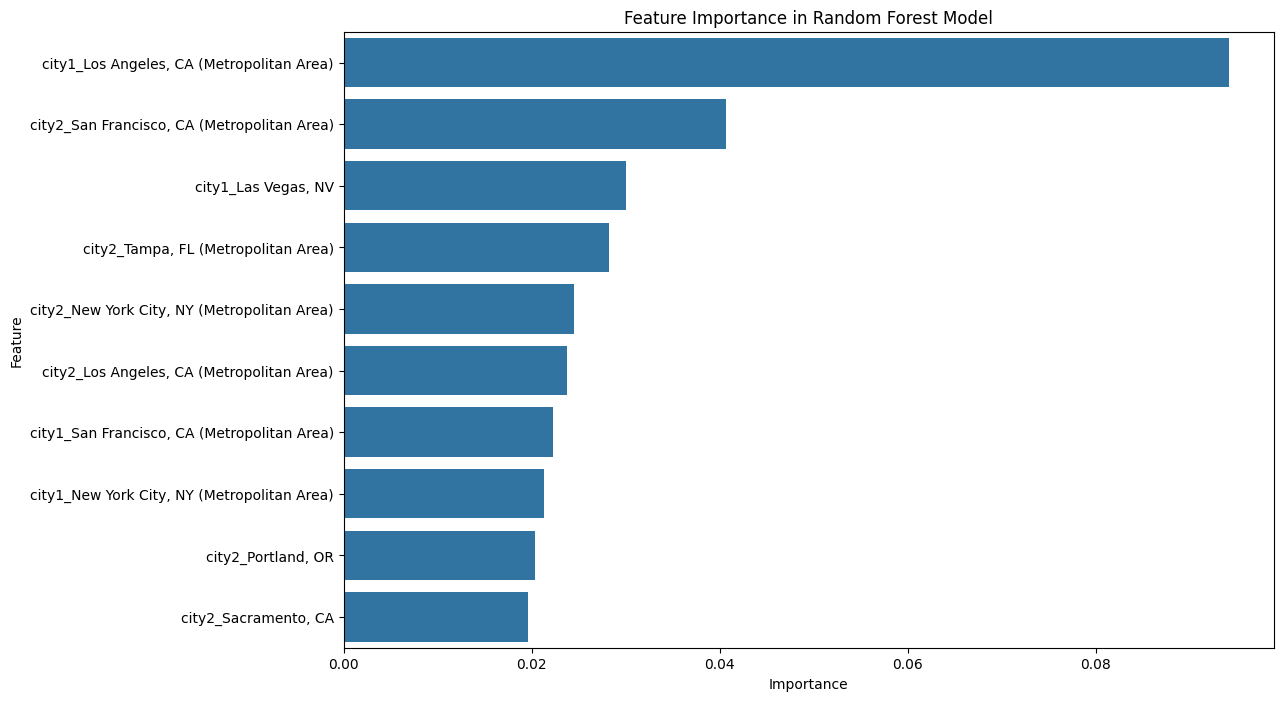

In [23]:
# Fit the pipeline on the training data if not already fitted
pipeline.fit(X_train, y_train)

# Get feature importances from the trained model
importances = pipeline.named_steps['model'].feature_importances_

# Get the feature names from the encoder
encoder = pipeline.named_steps['encoder']
feature_names = encoder.get_feature_names_out(X_train.columns)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#top 10
top_cities = importance_df.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_cities)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [57]:
# Extract city names from feature names
city_features = importance_df[importance_df['Feature'].str.startswith('city1_','city2_')]
city_importance = city_features.copy()
city_importance['City'] = city_importance['Feature'].str.replace('city1_', '').str.replace('city2_', '')

In [58]:
#number of flights from each city
flight_counts = flights_data['city1'].value_counts().reset_index()
flight_counts.columns = ['City', 'Number of Flights']

In [63]:
# Merge the feature importance with flight counts
merged_df = pd.merge(city_importance[['City', 'Importance']], flight_counts, on='City', how='outer')
merged_df = merged_df.sort_values(by='Importance', ascending=False)
merged_df = merged_df.sort_values(by='Importance', ascending=False).head(25)
merged_df['Scaled Importance'] = merged_df['Importance'] * 10000
merged_df['Proportional Importance'] = merged_df['Importance']/merged_df['Number of Flights']

In [64]:
merged_df

,City,Importance,Number of Flights,Scaled Importance,Proportional Importance
83,"Los Angeles, CA (Metropolitan Area)",0.094191,26055,941.912048,3.615091e-06
79,"Las Vegas, NV",0.029989,2848,299.893280,1.052996e-05
125,"San Francisco, CA (Metropolitan Area)",0.022238,3345,222.376638,6.648031e-06
102,"New York City, NY (Metropolitan Area)",0.021328,23175,213.284374,9.203209e-07
22,"Boston, MA (Metropolitan Area)",0.017204,23433,172.043174,7.341918e-07
32,"Chicago, IL",0.017164,18430,171.642652,9.313220e-07
47,"El Paso, TX",0.015235,1950,152.351445,7.812895e-06
90,"Miami, FL (Metropolitan Area)",0.014989,8180,149.886986,1.832359e-06
113,"Phoenix, AZ",0.013959,1994,139.593124,7.000658e-06
1,"Albuquerque, NM",0.013349,3197,133.494477,4.175617e-06


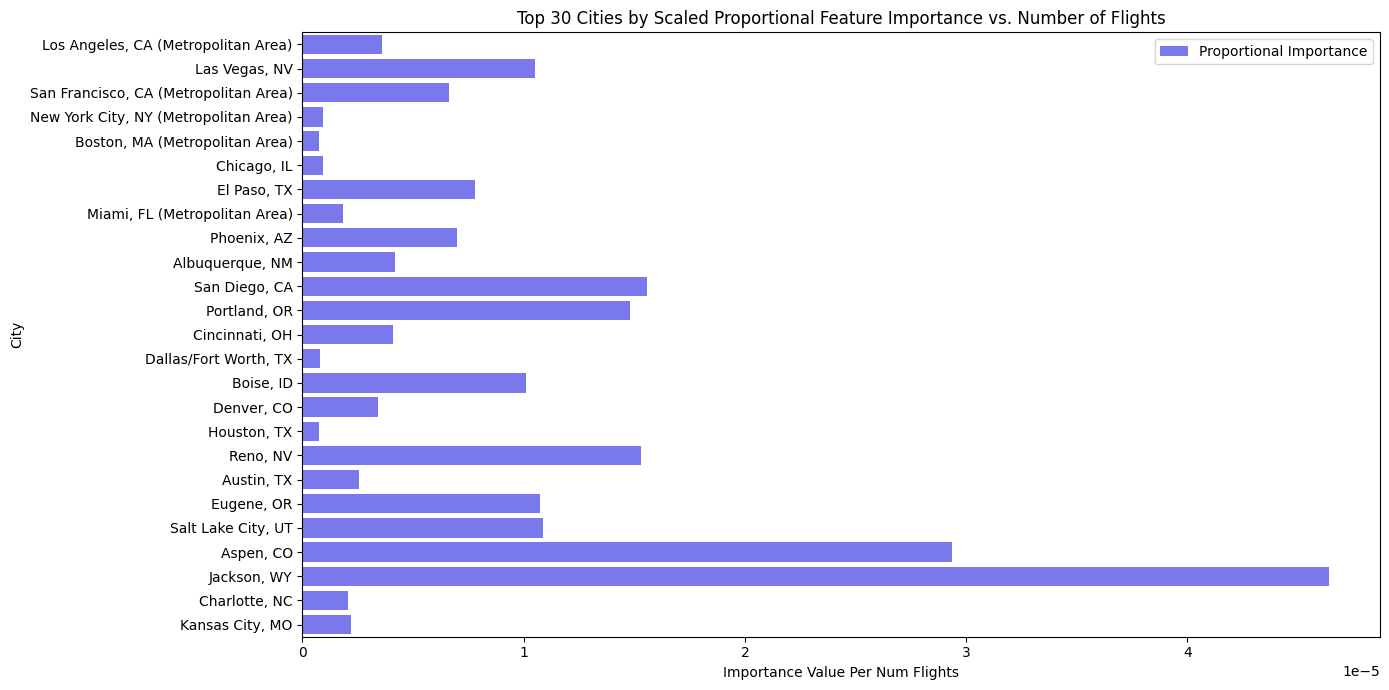

In [65]:
# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Proportional Importance', y='City', data=merged_df, color='blue', alpha=0.6, label='Proportional Importance')
plt.title('Top 30 Cities by Scaled Proportional Feature Importance vs. Number of Flights')
plt.xlabel('Importance Value Per Num Flights')
plt.ylabel('City')
plt.legend()
plt.tight_layout()
plt.show()